# Práctica 2 - Segmentación

### Patricia Córdoba Hidalgo

Importamos las librerías que usaremos

In [1]:
import pandas as pd
import numpy as np
from pract2_utils import * 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
datos = pd.read_csv("accidentes_2013.csv", na_values=["?"]) # Leemos los datos del csv

In [3]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='lime')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Escenario 1: Choque frontal en carretera convencional 

### Selección de datos

Estudiaremos los datos que representen choques frontales en carreteras convencionales. 

In [4]:
# Seleccionamos los datos con los que trabajaremos
caso_1 = datos[datos.TIPO_VIA == 'VÍA CONVENCIONAL']
caso_1 = caso_1[caso_1.TIPO_ACCIDENTE == 'Colisión de vehículos en marcha (Frontal)']
caso_1.head()

MES  HORA  DIASEMANA  PROVINCIA COMUNIDAD_AUTONOMA        ISLA  \
75     4  19.0          4  Barcelona           Cataluña  NO_ES_ISLA   
132   12  21.0          7     Girona           Cataluña  NO_ES_ISLA   
139    5  15.0          5     Girona           Cataluña  NO_ES_ISLA   
146   12   3.0          7     Lleida           Cataluña  NO_ES_ISLA   
150    3  15.0          6  Barcelona           Cataluña  NO_ES_ISLA   

     TOT_VICTIMAS  TOT_VICTIMAS30D  TOT_MUERTOS  TOT_MUERTOS30D  ...  \
75              2                2            0             0.0  ...   
132             3                3            0             0.0  ...   
139             1                1            0             0.0  ...   
146             3                3            0             0.0  ...   
150             2                2            0             0.0  ...   

         PRIORIDAD  SUPERFICIE_CALZADA             LUMINOSIDAD  \
75             NaN              MOJADA              CREPÚSCULO   
132  SEÑAL DE STOP              MOJADA  NOCHE: SIN ILUMINACIÓN   
139            NaN              MOJADA               PLENO DÍA   
146            NaN       SECA Y LIMPIA  NOCHE: SIN ILUMINACIÓN   
150            NaN       SECA Y LIMPIA               PLENO DÍA   

     FACTORES_ATMOSFERICOS  VISIBILIDAD_RESTRINGIDA OTRA_CIRCUNSTANCIA  \
75           LLUVIA FUERTE                      NaN            NINGUNA   
132            BUEN TIEMPO                      NaN            NINGUNA   
139            BUEN TIEMPO                      NaN            NINGUNA   
146            BUEN TIEMPO          DESLUMBRAMIENTO            NINGUNA   
150            BUEN TIEMPO                      NaN            NINGUNA   

           ACERAS                             TIPO_ACCIDENTE  \
75   NO HAY ACERA  Colisión de vehículos en marcha (Frontal)   
132  NO HAY ACERA  Colisión de vehículos en marcha (Frontal)   
139  NO HAY ACERA  Colisión de vehículos en marcha (Frontal)   
146  NO HAY ACERA  Colisión de vehículos en marcha (Frontal)   
150  NO HAY ACERA  Colisión de vehículos en marcha (Frontal)   

    DENSIDAD_CIRCULACION MEDIDAS_ESPECIALES  
75                   NaN                NaN  
132                  NaN                NaN  
139                  NaN                NaN  
146               FLUIDA     NINGUNA MEDIDA  
150                  NaN                NaN  

[5 rows x 32 columns]

In [5]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [6]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso1 = caso_1[atributos]
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 75 to 88793
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1448 non-null   int64
 1   TOT_MUERTOS               1448 non-null   int64
 2   TOT_HERIDOS_GRAVES        1448 non-null   int64
 3   TOT_HERIDOS_LEVES         1448 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1448 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


### Normalización de los datos

In [7]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso1_norm = scaler.fit_transform(caso1)
caso1_norm[:5]

array([[0.06666667, 0.        , 0.        , 0.14285714, 0.2       ],
       [0.13333333, 0.        , 0.        , 0.21428571, 0.2       ],
       [0.        , 0.        , 0.        , 0.07142857, 0.2       ],
       [0.13333333, 0.        , 0.4       , 0.07142857, 0.2       ],
       [0.06666667, 0.        , 0.        , 0.14285714, 0.2       ]])

### Algoritmos de clustering

#### K-Means

Seleccionamos el número de clusters a usar.

In [8]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

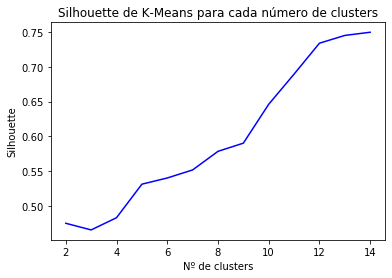

In [9]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

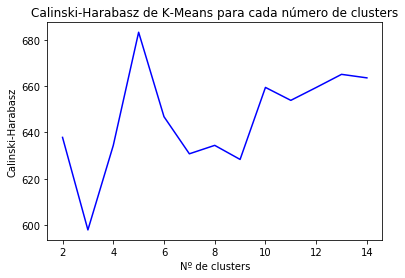

In [10]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [11]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.4755151052183163, 0.46599969633063953, 0.4834890867333391, 0.5315690552295909, 0.5404576589330072, 0.5519986909803549, 0.5786471085948178, 0.5903779353773022, 0.6461326222918197, 0.6893747693555886, 0.7336714808160643, 0.7448415168530551, 0.7494104698480949]

Calinski-Harabasz: 
[637.8831140088855, 597.9798532808658, 634.4016355078425, 683.2263367508311, 646.8004817570682, 630.8036708742871, 634.4445453990445, 628.3756258948337, 659.4342926638305, 653.852874658656, 659.3965542394021, 665.0690582901761, 663.5502144820157]


Elegimos usar 5 clusters.

In [12]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1_norm)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
print([m[i]/len(caso1) for i in range(len(m))])

[0.5124309392265194, 0.08080110497237569, 0.18646408839779005, 0.07527624309392265, 0.14502762430939226]


In [13]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.531569
calinsky: 683.226337


Visualizamos los centroides.

In [14]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, np.array(caso1), atributos)

Visualizamos otras gráficas

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


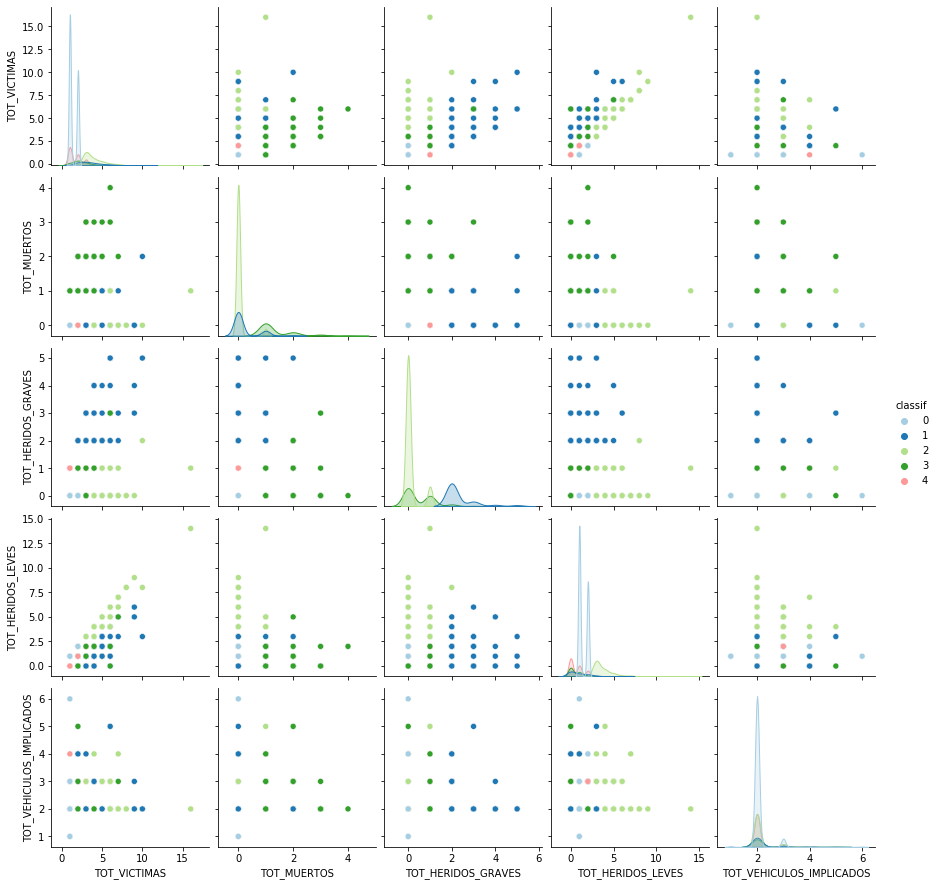

In [15]:
 pairplot(caso1, atributos, results5.labels_)

Visualizamos los diagramas de cajas:

In [16]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso1.copy()
datos_bp['Cluster'] = results5.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
75              2            0                   0                  2   
132             3            0                   0                  3   
139             1            0                   0                  1   
146             3            0                   2                  1   
150             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
75                          2        0  
132                         2        2  
139                         2        0  
146                         2        1  
150                         2        0

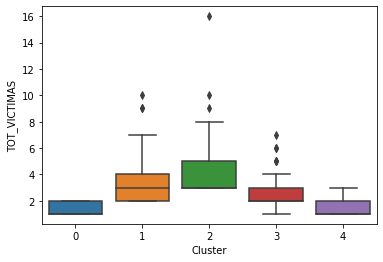

In [17]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

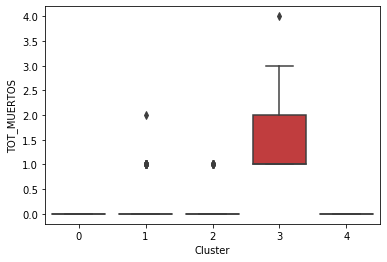

In [18]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

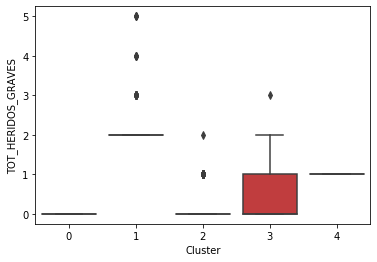

In [19]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

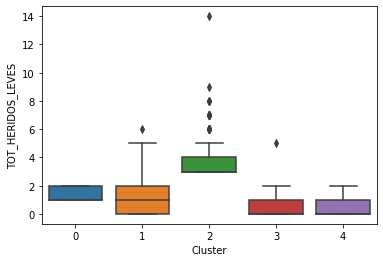

In [20]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

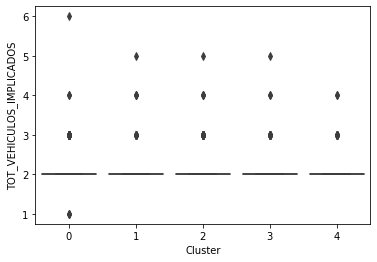

In [21]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

##### Análisis de clústers

Examinaremos las características de los clústers uno, dos y tres, que son aquellos con más heridos graves, leves y muertos respectivamente.

In [22]:
# Le añadimos a cada accidente del caso 1 el clúster al que pertenece
caso_1['Cluster'] =  results5.labels_
caso_1.head()

MES  HORA  DIASEMANA  PROVINCIA COMUNIDAD_AUTONOMA        ISLA  \
75     4  19.0          4  Barcelona           Cataluña  NO_ES_ISLA   
132   12  21.0          7     Girona           Cataluña  NO_ES_ISLA   
139    5  15.0          5     Girona           Cataluña  NO_ES_ISLA   
146   12   3.0          7     Lleida           Cataluña  NO_ES_ISLA   
150    3  15.0          6  Barcelona           Cataluña  NO_ES_ISLA   

     TOT_VICTIMAS  TOT_VICTIMAS30D  TOT_MUERTOS  TOT_MUERTOS30D  ...  \
75              2                2            0             0.0  ...   
132             3                3            0             0.0  ...   
139             1                1            0             0.0  ...   
146             3                3            0             0.0  ...   
150             2                2            0             0.0  ...   

     SUPERFICIE_CALZADA             LUMINOSIDAD  FACTORES_ATMOSFERICOS  \
75               MOJADA              CREPÚSCULO          LLUVIA FUERTE   
132              MOJADA  NOCHE: SIN ILUMINACIÓN            BUEN TIEMPO   
139              MOJADA               PLENO DÍA            BUEN TIEMPO   
146       SECA Y LIMPIA  NOCHE: SIN ILUMINACIÓN            BUEN TIEMPO   
150       SECA Y LIMPIA               PLENO DÍA            BUEN TIEMPO   

     VISIBILIDAD_RESTRINGIDA  OTRA_CIRCUNSTANCIA        ACERAS  \
75                       NaN             NINGUNA  NO HAY ACERA   
132                      NaN             NINGUNA  NO HAY ACERA   
139                      NaN             NINGUNA  NO HAY ACERA   
146          DESLUMBRAMIENTO             NINGUNA  NO HAY ACERA   
150                      NaN             NINGUNA  NO HAY ACERA   

                                TIPO_ACCIDENTE DENSIDAD_CIRCULACION  \
75   Colisión de vehículos en marcha (Frontal)                  NaN   
132  Colisión de vehículos en marcha (Frontal)                  NaN   
139  Colisión de vehículos en marcha (Frontal)                  NaN   
146  Colisión de vehículos en marcha (Frontal)               FLUIDA   
150  Colisión de vehículos en marcha (Frontal)                  NaN   

    MEDIDAS_ESPECIALES Cluster  
75                 NaN       0  
132                NaN       2  
139                NaN       0  
146     NINGUNA MEDIDA       1  
150                NaN       0  

[5 rows x 33 columns]

In [23]:
# Dividimos los datos por el clúster al que pertenezcan
cluster1 = caso_1[caso_1.Cluster == 1]
cluster2 = caso_1[caso_1.Cluster == 2]
cluster3 = caso_1[caso_1.Cluster == 3]

print(caso_1.shape[0])
print(Counter(cluster1['Cluster']))
print(Counter(cluster2['Cluster']))
print(Counter(cluster3['Cluster']))

1448
Counter({1: 117})
Counter({2: 270})
Counter({3: 109})


In [24]:
# Vemos la luminosidad que se dieron en este tipo de accidentes
print(Counter(caso_1['LUMINOSIDAD']))
print(Counter(cluster1['LUMINOSIDAD']))
print(Counter(cluster2['LUMINOSIDAD']))
print(Counter(cluster3['LUMINOSIDAD']))

Counter({'PLENO DÍA': 1053, 'NOCHE: SIN ILUMINACIÓN': 178, 'NOCHE: ILUMINACIÓN SUFICIENTE': 75, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 74, 'CREPÚSCULO': 68})
Counter({'PLENO DÍA': 79, 'NOCHE: SIN ILUMINACIÓN': 19, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 11, 'CREPÚSCULO': 6, 'NOCHE: ILUMINACIÓN SUFICIENTE': 2})
Counter({'PLENO DÍA': 196, 'NOCHE: SIN ILUMINACIÓN': 42, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 16, 'CREPÚSCULO': 9, 'NOCHE: ILUMINACIÓN SUFICIENTE': 7})
Counter({'PLENO DÍA': 77, 'NOCHE: SIN ILUMINACIÓN': 22, 'CREPÚSCULO': 5, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 4, 'NOCHE: ILUMINACIÓN SUFICIENTE': 1})


In [25]:
# Vemos los días de la semana en los que sucedieron este tipo de accidentes
print(Counter(caso_1['DIASEMANA']))
print(Counter(cluster1['DIASEMANA']))
print(Counter(cluster2['DIASEMANA']))
print(Counter(cluster3['DIASEMANA']))

Counter({7: 215, 5: 214, 6: 210, 2: 208, 4: 204, 1: 203, 3: 194})
Counter({5: 22, 6: 20, 7: 19, 2: 18, 4: 13, 1: 13, 3: 12})
Counter({7: 57, 4: 45, 6: 43, 5: 38, 1: 34, 2: 33, 3: 20})
Counter({5: 21, 4: 18, 2: 15, 6: 15, 3: 14, 7: 14, 1: 12})


#### DBSCAN

Seleccionamos los parámetros a usar.

In [26]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

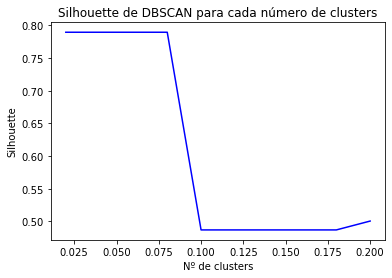

In [27]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

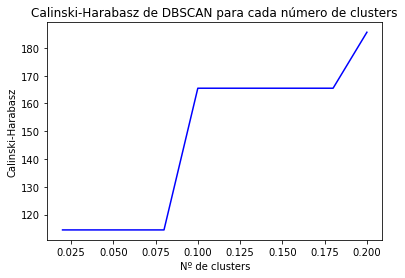

In [28]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [29]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.7895289623335725, 0.7895289623335725, 0.7895289623335724, 0.7895289623335725, 0.48698055687648606, 0.4869805568764862, 0.4869805568764862, 0.4869805568764863, 0.4869805568764862, 0.5005453962094686]

Calinski-Harabasz: 
[114.4553269039885, 114.4553269039885, 114.4553269039885, 114.4553269039885, 165.50098317272966, 165.50098317272966, 165.50098317272966, 165.50098317272966, 165.50098317272966, 185.66574970475563]


Elegimos eps=0.08.

[198, 264, 130, 433, 18, 106, 11, 60, 43, 29, 20, 31, 21, 15, 21, 19, 11, 18]

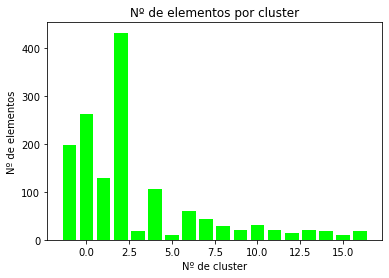

In [30]:
results08 = DBSCAN(eps=0.08, min_samples=10).fit(caso1_norm)
n = len(np.unique(results08.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso1_norm)):
    if results08.labels_[i]!=-1:
        m[results08.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[100, 908, 65, 221, 41, 25, 51, 11, 14, 12]

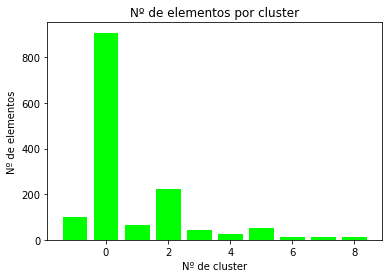

In [31]:
results01 = DBSCAN(eps=0.1, min_samples=10).fit(caso1_norm)
n = len(np.unique(results01.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso1_norm)):
    if results01.labels_[i]!=-1:
        m[results01.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [32]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results01.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.486981
calinsky: 165.500983


Visualizamos los centroides.

In [33]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso1.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results01.labels_
datos_cen.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
75              2            0                   0                  2   
132             3            0                   0                  3   
139             1            0                   0                  1   
146             3            0                   2                  1   
150             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
75                          2        0  
132                         2        0  
139                         2        0  
146                         2        1  
150                         2        0

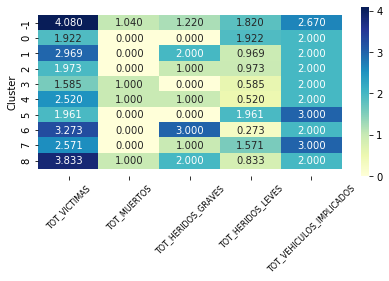

In [34]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso1), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

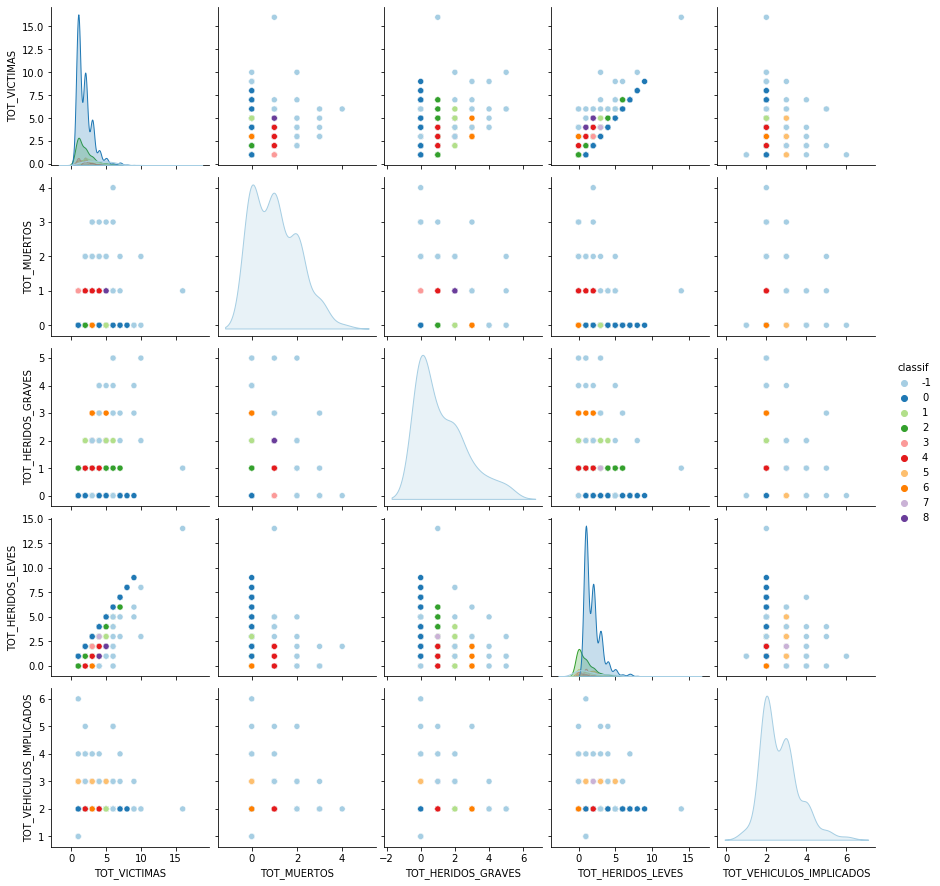

In [35]:
pairplot(caso1, atributos, results01.labels_)

In [36]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso1)
datos_bp['Cluster'] = results01.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
75              2            0                   0                  2   
132             3            0                   0                  3   
139             1            0                   0                  1   
146             3            0                   2                  1   
150             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
75                          2        0  
132                         2        0  
139                         2        0  
146                         2        1  
150                         2        0

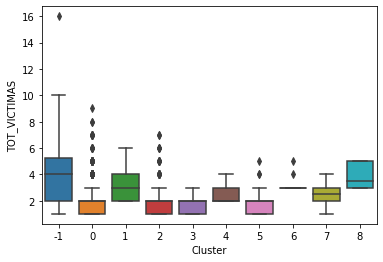

In [37]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

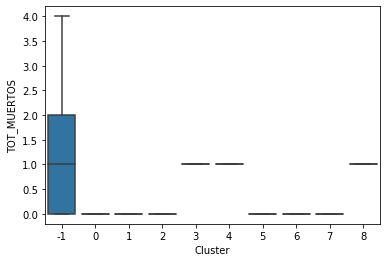

In [38]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

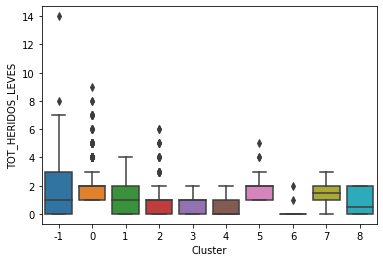

In [39]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

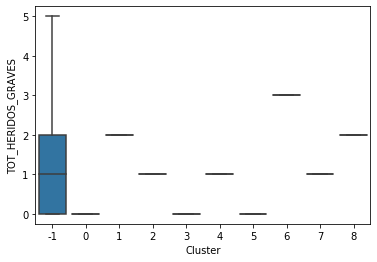

In [40]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

In [41]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

## Escenario 2: Fin de semana con densidad de circulación densa

### Visualización de datos

In [42]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(str)
print(Counter(datos['DIASEMANA']))

Counter({'5': 14614, '2': 13527, '4': 13469, '3': 13343, '1': 13185, '6': 11410, '7': 9971})


In [43]:
sns.boxplot(data=datos, x='DIASEMANA', y='TOT_VICTIMAS', showfliers = False)

In [44]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(int)

### Selección de datos

Estudiaremos los datos que representen accidentes de viernes a domingo.

In [45]:
# Seleccionamos los datos con los que trabajaremos
caso_2 = datos[(datos.DIASEMANA == 6) | (datos.DIASEMANA == 7) | (datos.DIASEMANA == 5)]
caso_2 = caso_2[caso_2.DENSIDAD_CIRCULACION == 'DENSA']

In [46]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [47]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso2 = caso_2[atributos]
caso2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 1 to 89472
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1383 non-null   int64
 1   TOT_MUERTOS               1383 non-null   int64
 2   TOT_HERIDOS_GRAVES        1383 non-null   int64
 3   TOT_HERIDOS_LEVES         1383 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1383 non-null   int64
dtypes: int64(5)
memory usage: 64.8 KB


### Normalización de los datos

In [48]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso2_norm = scaler.fit_transform(caso2)
caso2_norm[:5]

array([[0.   , 0.   , 0.   , 0.1  , 0.25 ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.375],
       [0.   , 0.   , 0.   , 0.1  , 0.125]])

### Algoritmos de clustering

#### K-Means

Seleccionamos los parámetros a usar.

In [49]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

In [50]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

In [51]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [52]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.5370884902834917, 0.5022253639905713, 0.5253455054070136, 0.4941822307189278, 0.5384826599151723, 0.601310808513732, 0.622859268196415, 0.7013609213343277, 0.7221502954295131, 0.7266476702162132, 0.7385815169799497, 0.7445925945766767, 0.7557938837992468]

Calinski-Harabasz: 
[680.6474578600636, 691.2087946486066, 731.3590806547992, 794.2278720981091, 904.0949725499044, 925.9700253681594, 942.1012174830314, 963.5793862878563, 954.6141788919715, 964.5578901852715, 996.4201247190041, 1032.2367917798642, 1058.1110463372995]


Elegimos usar 9 clusters.

In [53]:
results9 = KMeans(n_clusters=9, random_state=0).fit(caso2_norm)

# Número de elementos por cluster
m = [0 for i in range(9)]

for i in range(len(caso2)):
    m[results9.labels_[i]]+=1
    
graf_barras(range(9), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[135, 141, 415, 17, 48, 129, 240, 75, 183]

In [54]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results9.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.701361
calinsky: 963.579386


In [55]:
centroids = results9.cluster_centers_
visualize_centroids(centroids, np.array(caso2), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

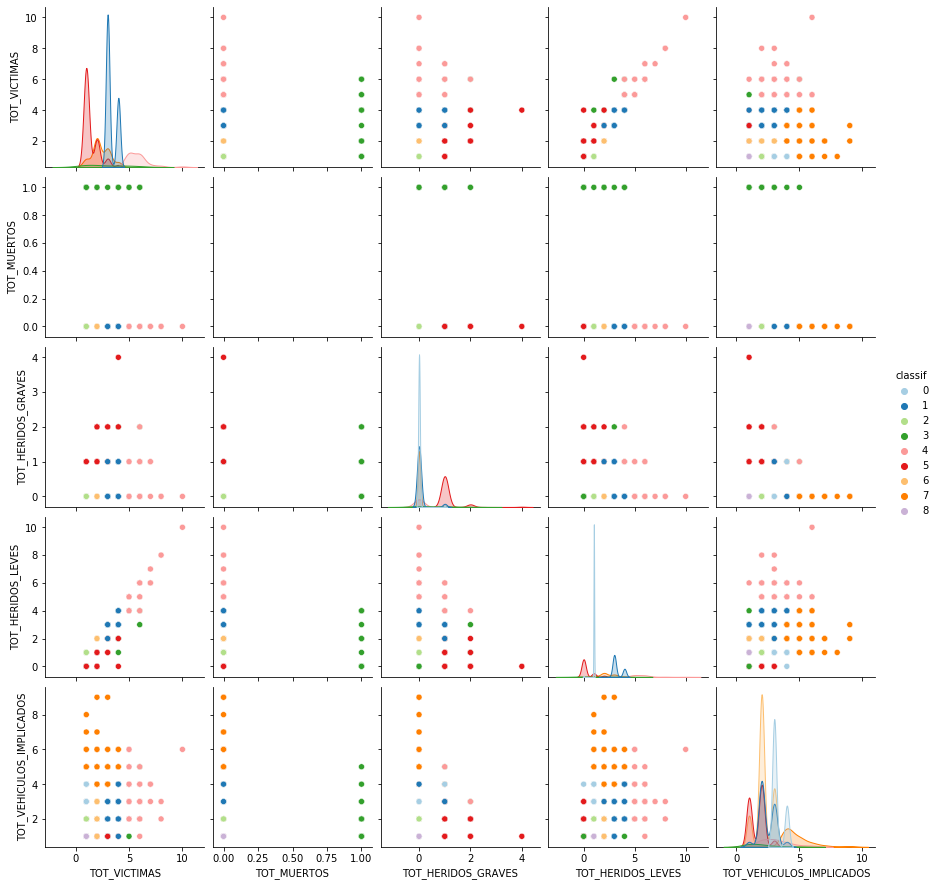

In [56]:
 pairplot(caso2, atributos, results9.labels_)

In [57]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso2.copy()
datos_bp['Cluster'] = results9.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
1               1            0                   0                  1   
126             1            0                   0                  1   
194             1            0                   0                  1   
210             1            0                   0                  1   
609             1            0                   0                  1   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
1                           3        0  
126                         1        8  
194                         1        8  
210                         4        0  
609                         2        2

In [58]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

In [59]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

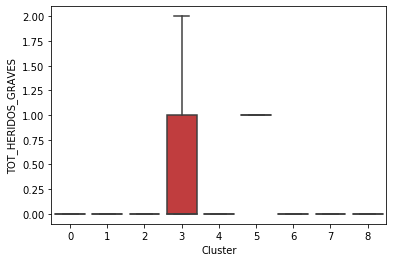

In [60]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

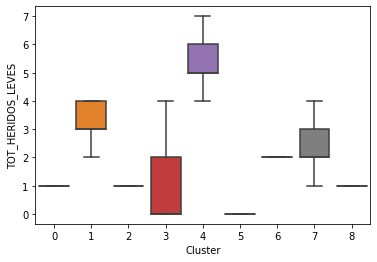

In [61]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

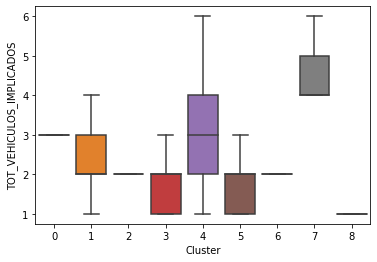

In [62]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster', showfliers = False)

##### Análisis de clústers

Examinaremos las condiciones en las que sucedieron los accidentes del clúster tres, cuatro y cinco que son los clústers con más muertos, heridos leves y heridos graves respectivamente.

In [63]:
# Le añadimos a cada accidente del caso 1 el clúster al que pertenece
caso_2['Cluster'] =  results9.labels_
caso_2.head()

MES  HORA  DIASEMANA PROVINCIA COMUNIDAD_AUTONOMA        ISLA  \
1      6  18.0          6   Bizkaia         País Vasco  NO_ES_ISLA   
126    5  19.0          5   Bizkaia         País Vasco  NO_ES_ISLA   
194    2  12.0          5   Bizkaia         País Vasco  NO_ES_ISLA   
210    3   0.0          5   Bizkaia         País Vasco  NO_ES_ISLA   
609   10  18.0          5   Bizkaia         País Vasco  NO_ES_ISLA   

     TOT_VICTIMAS  TOT_VICTIMAS30D  TOT_MUERTOS  TOT_MUERTOS30D  ...  \
1               1                1            0             0.0  ...   
126             1                1            0             0.0  ...   
194             1                1            0             0.0  ...   
210             1                1            0             0.0  ...   
609             1                1            0             0.0  ...   

     SUPERFICIE_CALZADA  LUMINOSIDAD  FACTORES_ATMOSFERICOS  \
1                MOJADA    PLENO DÍA            LLOVIZNANDO   
126       SECA Y LIMPIA    PLENO DÍA                   OTRO   
194              MOJADA    PLENO DÍA            LLOVIZNANDO   
210       SECA Y LIMPIA    PLENO DÍA                   OTRO   
609       SECA Y LIMPIA    PLENO DÍA            BUEN TIEMPO   

     VISIBILIDAD_RESTRINGIDA  OTRA_CIRCUNSTANCIA        ACERAS  \
1                 OTRA_CAUSA             NINGUNA  NO HAY ACERA   
126          SIN RESTRICCIÓN             NINGUNA  NO HAY ACERA   
194          SIN RESTRICCIÓN             NINGUNA  NO HAY ACERA   
210          SIN RESTRICCIÓN               OBRAS  NO HAY ACERA   
609          SIN RESTRICCIÓN             NINGUNA  NO HAY ACERA   

                                        TIPO_ACCIDENTE DENSIDAD_CIRCULACION  \
1            Colisión de vehículos en marcha (Alcance)                DENSA   
126  Salida de la vía por la derecha sin colisión (...                DENSA   
194  Salida de la vía por la izquierda con colisión...                DENSA   
210          Colisión de vehículos en marcha (Alcance)                DENSA   
609    Colisión de vehículos en marcha (Frontolateral)                DENSA   

    MEDIDAS_ESPECIALES Cluster  
1       NINGUNA MEDIDA       0  
126     NINGUNA MEDIDA       8  
194     NINGUNA MEDIDA       8  
210        OTRA MEDIDA       0  
609     NINGUNA MEDIDA       2  

[5 rows x 33 columns]

In [64]:
# Dividimos los datos por el clúster al que pertenezcan
cluster3 = caso_2[caso_2.Cluster == 3]
cluster4 = caso_2[caso_2.Cluster == 4]
cluster5 = caso_2[caso_2.Cluster == 5]

print(caso_2.shape[0])
print(Counter(cluster3['Cluster']))
print(Counter(cluster4['Cluster']))
print(Counter(cluster5['Cluster']))

1383
Counter({3: 17})
Counter({4: 48})
Counter({5: 129})


In [65]:
# Vemos los factores atmosféricos que se dieron en este tipo de accidentes
print(Counter(caso_2['ZONA_AGRUPADA']))
print(Counter(cluster3['ZONA_AGRUPADA']))
print(Counter(cluster4['ZONA_AGRUPADA']))
print(Counter(cluster5['ZONA_AGRUPADA']))

Counter({'VÍAS INTERURBANAS': 783, 'VÍAS URBANAS': 600})
Counter({'VÍAS INTERURBANAS': 13, 'VÍAS URBANAS': 4})
Counter({'VÍAS INTERURBANAS': 33, 'VÍAS URBANAS': 15})
Counter({'VÍAS INTERURBANAS': 71, 'VÍAS URBANAS': 58})


In [66]:
# Vemos la luminosidad que se dieron en este tipo de accidentes
print(Counter(caso_2['LUMINOSIDAD']))
print(Counter(cluster3['LUMINOSIDAD']))
print(Counter(cluster4['LUMINOSIDAD']))
print(Counter(cluster5['LUMINOSIDAD']))

Counter({'PLENO DÍA': 1059, 'NOCHE: ILUMINACIÓN SUFICIENTE': 169, 'CREPÚSCULO': 61, 'NOCHE: SIN ILUMINACIÓN': 51, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 43})
Counter({'PLENO DÍA': 10, 'NOCHE: SIN ILUMINACIÓN': 5, 'CREPÚSCULO': 1, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 1})
Counter({'PLENO DÍA': 31, 'NOCHE: ILUMINACIÓN SUFICIENTE': 9, 'CREPÚSCULO': 4, 'NOCHE: SIN ILUMINACIÓN': 3, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 1})
Counter({'PLENO DÍA': 94, 'NOCHE: ILUMINACIÓN SUFICIENTE': 20, 'CREPÚSCULO': 7, 'NOCHE: ILUMINACIÓN INSUFICIENTE': 4, 'NOCHE: SIN ILUMINACIÓN': 4})


In [67]:
print(caso_2[caso_2.TIPO_ACCIDENTE == 'Atropello a peatón aislado o en grupo'].shape[0])
print(cluster3[cluster3.TIPO_ACCIDENTE == 'Atropello a peatón aislado o en grupo'].shape[0])
print(cluster4[cluster4.TIPO_ACCIDENTE == 'Atropello a peatón aislado o en grupo'].shape[0])
print(cluster5[cluster5.TIPO_ACCIDENTE == 'Atropello a peatón aislado o en grupo'].shape[0])

135
5
0
26


#### DBSCAN

Seleccionamos los parámetros a usar.

In [68]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

In [69]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

In [70]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [71]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.82892254556956, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.4536119566421056, 0.4045951263790732, 0.4045951263790732, 0.4070106956614259]

Calinski-Harabasz: 
[116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 220.24625024938823, 200.4202941262233, 200.4202941262233, 172.58676418042137]


Elegimos eps=0.14.

[61, 740, 19, 94, 273, 17, 117, 44, 18]

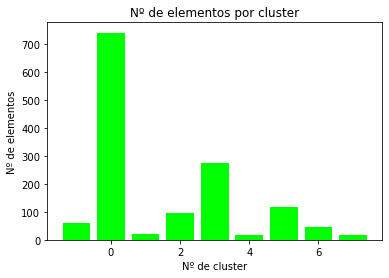

In [72]:
results = DBSCAN(eps=0.14, min_samples=10).fit(caso2_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso2_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [73]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.453612
calinsky: 220.246250


Visualizamos los centroides.

In [74]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso2.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
1               1            0                   0                  1   
126             1            0                   0                  1   
194             1            0                   0                  1   
210             1            0                   0                  1   
609             1            0                   0                  1   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
1                           3        0  
126                         1        0  
194                         1        0  
210                         4        0  
609                         2        0

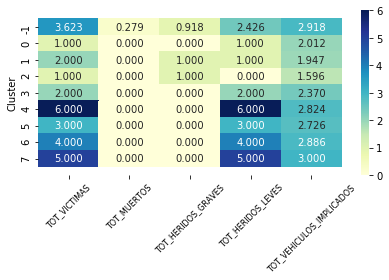

In [75]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso2), atributos)

In [76]:
pairplot(caso2, atributos, results.labels_)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

In [77]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso2)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
1               1            0                   0                  1   
126             1            0                   0                  1   
194             1            0                   0                  1   
210             1            0                   0                  1   
609             1            0                   0                  1   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
1                           3        0  
126                         1        0  
194                         1        0  
210                         4        0  
609                         2        0

In [78]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

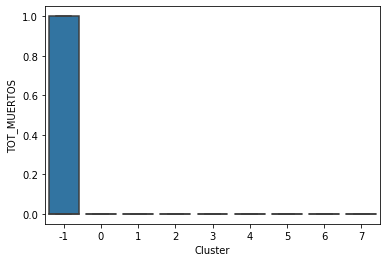

In [79]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

In [80]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

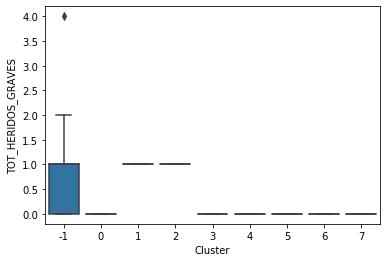

In [81]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

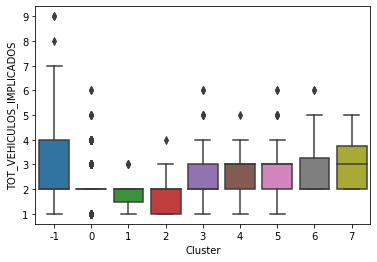

In [82]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

## Escenario 3: Entre semana con densidad de circulación densa

### Selección de datos

In [83]:
# Seleccionamos los datos con los que trabajaremos
caso3 = datos[(datos.DIASEMANA == 1) | (datos.DIASEMANA == 2) | (datos.DIASEMANA == 3) | (datos.DIASEMANA == 4)]
caso3 = caso3[caso3.DENSIDAD_CIRCULACION == 'DENSA']

In [84]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [85]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso3 = caso3[atributos]
caso3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 13 to 89517
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              2600 non-null   int64
 1   TOT_MUERTOS               2600 non-null   int64
 2   TOT_HERIDOS_GRAVES        2600 non-null   int64
 3   TOT_HERIDOS_LEVES         2600 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  2600 non-null   int64
dtypes: int64(5)
memory usage: 121.9 KB


### Normalización de datos

In [86]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso3_norm = scaler.fit_transform(caso3)
caso3_norm[:5]

array([[0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.        , 0.        , 0.        , 0.07142857, 0.06896552],
       [0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.07142857, 0.        , 0.        , 0.14285714, 0.10344828]])

### Algoritmos de clústering

#### K-means

Seleccionamos los parámetros a usar.

In [87]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso3_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

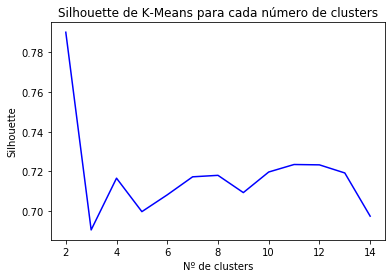

In [88]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

In [89]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [90]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.7901017312445583, 0.6905258174794834, 0.7165882158328285, 0.6997302171607824, 0.7081949623134675, 0.7172739598299913, 0.7180182979610455, 0.7093267907202337, 0.7196928899841788, 0.7234741493620662, 0.7232982041710023, 0.7192164530386996, 0.6974543104655525]

Calinski-Harabasz: 
[3323.5016323001405, 3525.6287793192128, 3618.7158935218295, 3795.7422278443883, 4701.551455912414, 4917.075118492225, 5328.482755105567, 5365.788661855421, 5423.525859490967, 5615.469394789773, 5867.24077956305, 6188.017509532395, 6464.06705569186]


[1993, 233, 342, 32]

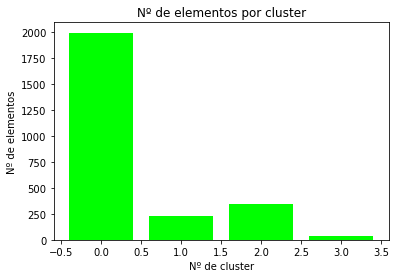

In [91]:
results4 = KMeans(n_clusters=4, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(4)]

for i in range(len(caso3_norm)):
    m[results4.labels_[i]]+=1
    
graf_barras(range(4), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [92]:
results8 = KMeans(n_clusters=8, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(8)]

for i in range(len(caso3)):
    m[results8.labels_[i]]+=1
    
graf_barras(range(8), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[1482, 211, 275, 32, 22, 511, 66, 1]

In [93]:
results12 = KMeans(n_clusters=12, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(12)]

for i in range(len(caso3)):
    m[results12.labels_[i]]+=1
    
graf_barras(range(12), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[1482, 159, 191, 15, 1, 29, 511, 30, 120, 7, 52, 3]

Elegimos 4 clústers.

In [94]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results4.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.716588
calinsky: 3618.715894


Visualizamos los centroides.

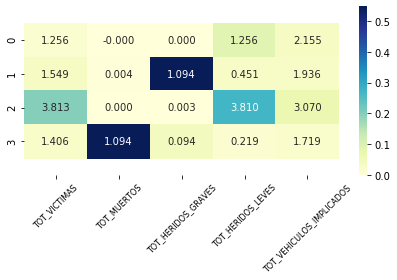

In [95]:
centroids = results4.cluster_centers_
visualize_centroids(centroids, np.array(caso3), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


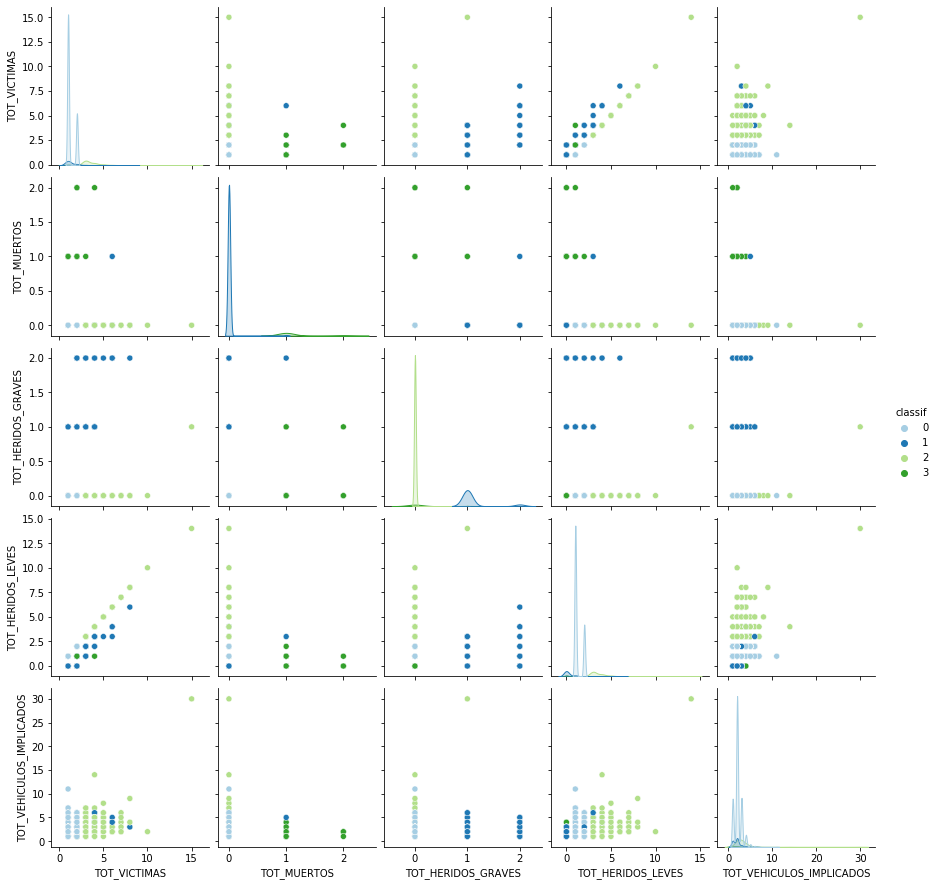

In [96]:
pairplot(caso3, atributos, results4.labels_)

In [97]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso3.copy()
datos_bp['Cluster'] = results4.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
13              1            0                   0                  1   
23              1            0                   0                  1   
48              1            0                   0                  1   
367             1            0                   0                  1   
481             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
13                          2        0  
23                          2        0  
48                          3        0  
367                         2        0  
481                         4        0

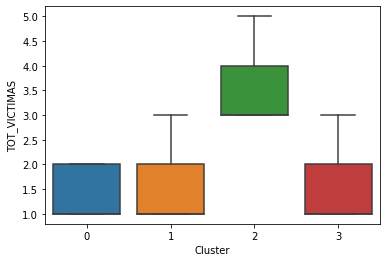

In [98]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

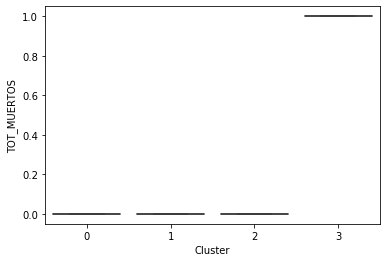

In [99]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

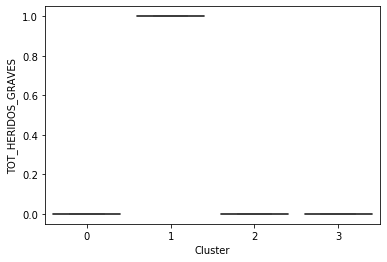

In [100]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

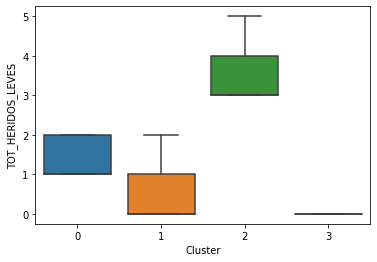

In [101]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

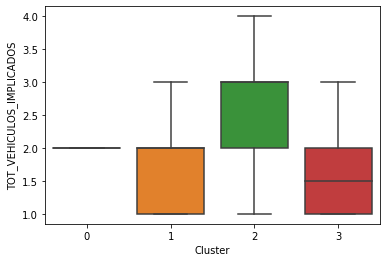

In [102]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster',showfliers = False)

#### DBSCAN

Seleccionamos los parámetros a usar.

In [103]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso3_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

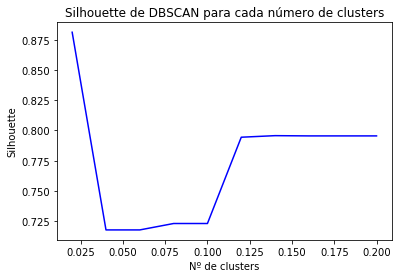

In [104]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

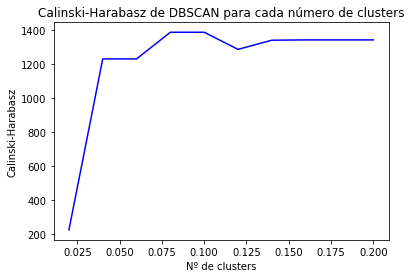

In [105]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [106]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.8813554395557858, 0.7176455278123451, 0.7176455278123451, 0.7229551894566059, 0.7229551894566059, 0.7944150822377707, 0.7957146553352213, 0.7955070215626333, 0.7955070215626336, 0.7955070215626334]

Calinski-Harabasz: 
[222.44145602974191, 1230.4090960667304, 1230.4090960667304, 1387.6592433383134, 1387.6592433383134, 1286.7594060038498, 1340.657424226088, 1342.5476210406275, 1342.5476210406275, 1342.5476210406275]


Elegimos eps=0.14, ya que en él aumenta Silhouette y Clalinski

[14, 2331, 211, 27, 17]

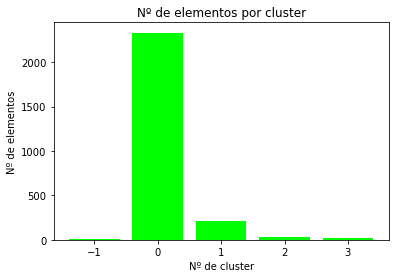

In [107]:
results = DBSCAN(eps=0.14, min_samples=10).fit(caso3_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso3_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [108]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.795715
calinsky: 1340.657424


Visualizamos los centroides.

In [109]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso3.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
13              1            0                   0                  1   
23              1            0                   0                  1   
48              1            0                   0                  1   
367             1            0                   0                  1   
481             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
13                          2        0  
23                          2        0  
48                          3        0  
367                         2        0  
481                         4        0

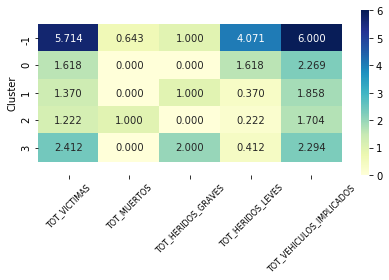

In [110]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso3), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

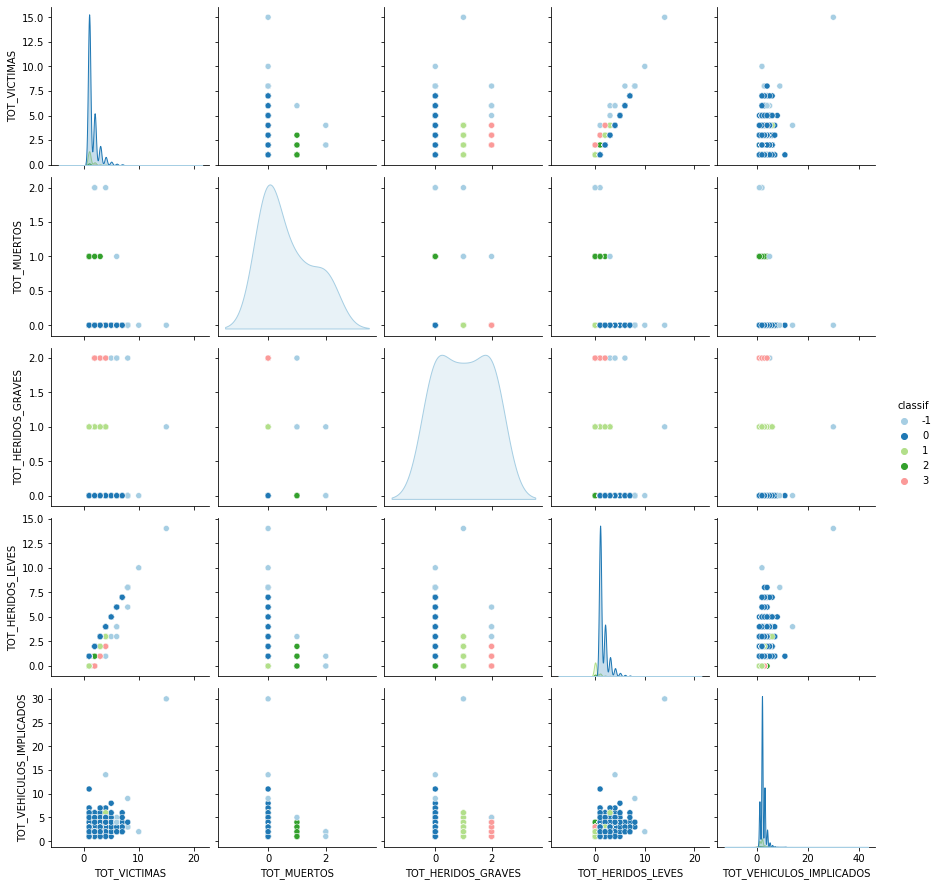

In [111]:
pairplot(caso3, atributos, results.labels_)

In [112]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso3)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

TOT_VICTIMAS  TOT_MUERTOS  TOT_HERIDOS_GRAVES  TOT_HERIDOS_LEVES  \
13              1            0                   0                  1   
23              1            0                   0                  1   
48              1            0                   0                  1   
367             1            0                   0                  1   
481             2            0                   0                  2   

     TOT_VEHICULOS_IMPLICADOS  Cluster  
13                          2        0  
23                          2        0  
48                          3        0  
367                         2        0  
481                         4        0

In [113]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

In [114]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

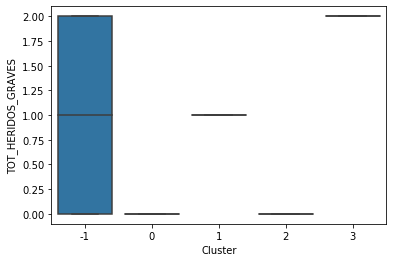

In [115]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

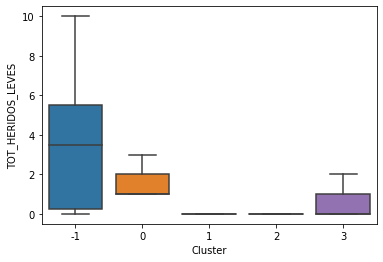

In [116]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

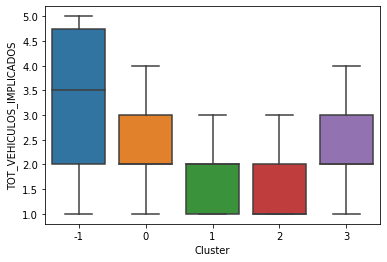

In [117]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster', showfliers = False)